# Introduction

Logical operators in Pandas: `&`, `|`, `~`. If there are multiple expressions, each one is wrapped inside of parentheses `()` 


You can pipe different commands like this:

```py
df['Col1'].str.lower().str.contains('string')
```


The two main data structures in Pandas are **Series** and **DataFrames**



# Formats: series, dataframes

In [13]:
# Series
import pandas as pd

# Define one column of values
var1 = pd.Series([10, 50, 10, 30, 20])
var1.name = 'var1_series'
print(var1)
print('\n')

# Create column row-by-row using indeces
var2 = pd.Series({
	'Row1': 505, 
	'Row2': 510, 
	'Row3': 516
}, name = 'var2_series')
print(var2)
print('\n')

# or
var3 = pd.Series([505, 510, 516], index=['Row1', 'Row2', 'Row3'], name='var3_series')
print(var3)

df = pd.concat([var2, var3], axis=1)
df


0    10
1    50
2    10
3    30
4    20
Name: var1_series, dtype: int64


Row1    505
Row2    510
Row3    516
Name: var2_series, dtype: int64


Row1    505
Row2    510
Row3    516
Name: var3_series, dtype: int64


,var2_series,var3_series
Row1,505,505
Row2,510,510
Row3,516,516


In [2]:
import pandas as pd

var2 = pd.Series({
	'Row1': 505, 
	'Row2': 510, 
	'Row3': 516
})

### Iterate through
for i,j in enumerate(var2):
    if i == 1:
        print(i, var2.index[i])

1 Row2


In [ ]:
# boolean array
var2 > 510
# Series masked with boolean array
var2[var2 > 510]

# Dataframes 
# Dataframe column is a Series

# Convert series to dataframe

# method 1
name = pd.Series(['Evgenii', 'Caro', 'Cat'])
age = pd.Series([24, 27, 11])
df = pd.DataFrame({'name': name, 'age': age})
df

# method 2
df2 = name.to_frame().reset_index()
df2

,index,0
0,0,Evgenii
1,1,Caro
2,2,Cat


In [ ]:
# DATAFRAMES

# Pandas format is similar to a dictionary of lists, more specifically, 
# a series data structure (2D data structure)

# Option 1
people = {
	'name': ['John', 'Steve', 'Stephen', 'Jane'], 
	'surname': ['Cramer', 'Buscemi', 'King', 'Foster'], 
	'age': [55, 43, 40, 25], 
}
people_df = pd.DataFrame(people)

# Option 2
people_df = pd.DataFrame({
	'name': ['John', 'Steve', 'Stephen', 'Jane'], 
	'surname': ['Cramer', 'Buscemi', 'King', 'Foster'], 
	'age': [55, 43, 40, 25], 
})

# Option 3
# Create a 5-column, 100-row pandas DataFrame
import numpy as np
npArray = np.random.random(size=(100, 5))
df = pd.DataFrame(npArray, columns=['one', 'two', 'three', 'four', 'five'])


In [ ]:
# Create an empty dataframe
import pandas as pd
df = pd.DataFrame([], columns=['Column 1', 'Column 2', 'Column 3'])
df

,Column 1,Column 2,Column 3


In [ ]:
# Modify dataframe by a series

df1 = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    },
    index=['Evgenii', 'John', 'Asuka', 'Yagami'],
)

series1 = pd.Series(
	['Japanese', 'English'], 
	index=['Yagami', 'Evgenii']
)

df1['Languages'] = series1
df1


,Age,Height,Mark,Sport,Languages
Evgenii,24,186,A,Gym,English
John,25,186,C,Volleyball,NaN
Asuka,23,182,A,Baseball,NaN
Yagami,20,175,B,Cricket,Japanese


In [ ]:
# Create a DataFrame copy

import pandas as pd

df1 = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    },
    index=['Evgenii', 'John', 'Asuka', 'Yagami'],
)

df2 = df1.copy(deep=True)
df2.head()

,Age,Height,Mark,Sport
Evgenii,24,186,A,Gym
John,25,186,C,Volleyball
Asuka,23,182,A,Baseball
Yagami,20,175,B,Cricket


In [ ]:
# Create a DF from a multidimensional NumPy array
import numpy as np
import pandas as pd

a = np.array( [[1,10],[2,20],[3,30]] )

df = pd.DataFrame({
	'Column1': a[:,0],
	'Column2': a[:,1]
})

df

,Column1,Column2
0,1,10
1,2,20
2,3,30


In [ ]:
# Convert a dataframe into numpy array

df = pd.DataFrame({
	'Col1': [1, 2, 3, 4, 5], 
	'Col2': [10, 20, 30, 40, 50], 
	'Col3': [100, 200, 300, 400, 500]
})

# Convert one column
print( df['Col2'].to_numpy() )

# Convert all columns
print( df.to_numpy() )


[10 20 30 40 50]
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]
 [  5  50 500]]


# Import / export data

There are a couple of pre-loaded datasets:
```py
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()
```

```py
###########################################################################################
#####   Reader   ##########################################################################
###########################################################################################

# Read from web url
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

# File reader
varname = pd.read_csv(
	'name.csv', 
	sep='\t', # or delimiter = '\t'; specify custom data delimiter
	header=None, # if file doesn't have a header
	na_values=['', '?', '-'], # defines values which are recognised as NA/NaN
	usecols=['Column1', 'Column2'], # only import the specified columns
	names=['Col1', 'Column2'], # pass names of columns
	dtype={'Col1': 'float'}, # parameter to force pandas to use certain dtype for a specified column
	parse_dates=[0], # parse_dates = True; parse_dates = ['Date']
	index_col=[0], # or index_col = 'Respondent' ; set one columns as an index column in dataframe
	decimal=',', 
	delim_whitespace=True, # as delimiters, whitespace of length 1 or more will be considered
	skiprows=2, # skip reading the first 2 rows from the file
	nrows=10 # number of a file's rows to read
)
df = pd.read_excel('data.slxs')
df = pd.read_json('filename.json')

###########################################################################################
#####   Writer   ##########################################################################
###########################################################################################

df.to_csv(
	'filename.tsv', # can be .tsv, just specify parameter 'sep' 
	sep='\t',
	index=False, # don't output index column
	header=True # do you want to export header?
)
df.to_excel('filename.xlsx')
df.to_json('filename.json')
df.to_numpy()


# Copy dataframe
df2 = df.copy()
```

---

```py

# Batch process: read .json files from directory FolderWithJsonFiles, convert them to .tsv, save to current dir
import os; import pandas as pd

files = os.listdir('json')

if not os.path.exists('/tsv'):
	os.mkdir('tsv')
for i in files:
	print(i)
	df = pd.read_json(f'json/{i}')
	df = df[df[0] != '\n']
	name_noextension = i.split('.')[0]
	name_tsvextension = name_noextension + '.tsv'
	df.to_csv(f"tsv/{name_tsvextension}", sep='\t', index=False, header=False)
	print(f"Wrote tsv/{name_tsvextension}!")

```

# View / Filter

To prevent the ubiquitous `SettingWithCopyWarning: a value is trying to be set on a copy of a slice from a DataFrame` warning, you can copy the filtered dataframe:
```py
# instead of this
df2 = df.query('Duration > 100') # -> SettingWithCopyWarning
# Use this
df2 = df.query('Duration > 100').copy()
```

After some operations, such as filtering out rows, the continuity of index gets interrupted. In these situations, you might need to reset the index:
```py
df = df.reset_index()

# Boolean array
mask = df['Colname'] > 100
df[mask]
```

```py
### View pandas dataframe in a beautiful format
display(df.head())
pd.set_option('display.max_columns', 2) # See a specified amount of columns
df.shape # Shows numbers of rows, columns. Attribute, so no parentheses
df.shape[0] # Number of rows
df.shape[1] # Number of columns
df.info() # Shows index, name, and datatype of each column, with count of nonnull values
# Show a summary of numerical variables
df.describe() 
df.dtypes # Show data types of variables
df['Col1'].unique() # Shows unique values in a column

df['Col1'][0] # Access a specific value by column name and row index

###########################################################################################
#####   COLUMNS   #########################################################################
###########################################################################################
df.columns # List all columns
list(df.columns) # List all columns in datatype 'list'
# Creeate a list out of a single column
list(df['Col1']) 
df['column'].tolist()

# Get all values for one row for all columns
list( df.values[0] )

# Convert df to nested list, where each sublist consists of values for each row
df.values.tolist()

# Get str of one value in one column
df['Col1'].item()

df['Col1'] # Access a column
df.Col1
df[['Col1', 'Col2']] # Access multiple columns
df['Col1'].apply(len) # Check length of each item in column
df['Col1'] = df['Col1'].apply(lambda x: x.lower())
df.apply(pd.Series.min) # Return the minimum values for each column
df.apply(lambda x: x.min())
# For a categorical variable, print unique categories in a column
df['Col1'].value_counts()

df[['Col1', 'Col2']] # Only take specified columns
df1 = df.drop(["Survived"], axis=1) # Filter out all columns except "Survived"
df.loc[:, df.columns != 'column2'] # Take all columns except for 'column2'

df[df['Col1'].isin(['Name1'])] # Filter: Col1 = Name1
df[df['Col1'].str.contains('Name1', na=False)] # Filter: Column contains Name1
df[df['Col1'].str.contains('this|that')==False] # Filter rows which DO NOT contain str 'this' or 'that'
df[df['Col1'].str.startswith('D')]
df[df['Col1'] > 100] # Filter by 1 condition
df[ (df['Col1'] > 100) & (df['Col2'] != 5) ] # Filter by two IF conditions
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10 # In column 'Age', if value is greater than 100, divide it by 10:
df[df['Col1'].between(left=4, right=5)] # Filter column btw two values
# apply the same filter condition on multiple columns
df[(df[cols] % 2 == 0).any(axis=1)] # cols = list of columns, e.g. df.columns

###########################################################################################
#####   ROWS   ############################################################################
###########################################################################################
df.head(10) # See the first 10 rows
df[['Col1', 'Col2']].head(5) # Show the first 5 rows of the specified columns
df.tail(10) # See the last 10 rows

df.iloc[0] # Access a row by index
df.loc[0]
df['Date'].loc[0]
df.iloc[[0, 1]] # Access multiple rows
df.iloc[1:4]
df.loc[[0, 1]]
df.iloc[[0, 1], 2] # Access multiple rows in a specific column by INDEX
df.loc[[0, 1], 'Col1'] # Access multiple rows in a specific column by LABEL
df.loc[[0, 1], ['Col1', 'Col2']]
df.loc[0:2, 'Col1':'Col2']

# Iterate over all rows
for index, row in df.iterrows():
	print(index, row['Colname'])
	if row['Name'] == 'Jane':
		df['Name'].iloc[index] = 'Found Jane!'

# Access all rows containing 'Keyword' in a column:
for iter, i in enumerate(df['Col1']):
	if 'Keyword' in i:
		print( df.loc[iter] )

df.loc[ df['Col1'] == 'Value' ] # Filter rows containing 'Value' in 'Col1'

# Slice DataFrame
df.iloc[startrow:endrow, startcolumn:endcolumn]
# Get rows 10-20, all columns
df.iloc[10:20, :]
df.iloc[10:20]

```

In [4]:
## Slice pandas dataframe based on a list of indices
import pandas as pd

df = pd.DataFrame({
	'feature1': [i for i in range(100)],
	'feature2': [i for i in range(500, 600)],
	'label': ['0' for i in range(50)] + ['1' for i in range(50)]
})

df.iloc[[0,1,2,50,51,60]]

,feature1,feature2,label
0,0,500,0
1,1,501,0
2,2,502,0
50,50,550,1
51,51,551,1
60,60,560,1


# Query

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# You can filter this column using .loc and filter statements - traditional filter statements

df[ (df['sepal_length'] > 5) & (df['sepal_width'] > 3.5) ]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
21,5.1,3.7,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [ ]:
# Alternatively, you can string many filter statements using the "query" method instead

df.query('sepal_length > 5 & sepal_width > 3.5 & species.str.startswith("v").values')

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
131,7.9,3.8,6.4,2.0,virginica


In [ ]:
sep_len_min = 5
sep_wid_min = 3.5

df.query('sepal_length > @sep_len_min & sepal_width > @sep_wid_min') # Alternatively, you can use f-strings to insert values of variables

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
21,5.1,3.7,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [ ]:
df.query('petal_length > sepal_width and species == "virginica"')

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [ ]:
pet_len_values = [5, 6]
df.query("petal_length in @pet_len_values")

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
100,6.3,3.3,6.0,2.5,virginica
113,5.7,2.5,5.0,2.0,virginica
119,6.0,2.2,5.0,1.5,virginica
125,7.2,3.2,6.0,1.8,virginica
146,6.3,2.5,5.0,1.9,virginica


# Data proc

```py

# COLUMNS EDIT
import pandas as pd
df = pd.DataFrame({'col1': [1, 2], 'col2': [10, 20], 'col3': ['1', '2'], 'col4': ['10', '20']})
df['newCol'] = df['col3'] + ' ' + df['col4'] # Add a new column
df['col1'] = df['col1'] + 1000000000 # Add a number to each value in a column
# Rearrange column order - put last column as first
colNames = list(df.columns.values)
df = df[colNames[-1:] + colNames[:-1]]

# Split one column into multiple based on a delimiter
## No assignment of new column names
df = df['col1'].str.split(';', expand=True)
## Assign new names to columns
df[['col3-1', 'col3-2']] = df['col3'].str.split(';', expand=True)

# Extract numbers from a DataFrame column
df['column'].str.extract(r'([0-9]+)')

df.rename(
	columns={'Name1':'Column1', 'Name2':'Column2'}, # Change names of the specified columns
	index = {'United States': 'USA', 'United Kingdom':'UK'}, # Rename indices if they are set to custom values
	inplace=True
) 
df.columns = ['Item name', 'col1', 'Amount', 'Longevity years'] # Change names of all columns in a df
df.columns = [x.upper() for x in df.columns] # Make all column titles upper case
df['ITEM_NAME'] = df['ITEM_NAME'].str.lower() # Change all items in a column

# Remove columns
df.drop(['A'], axis=1)
df.drop(columns=['col1', 'col2'], inplace=True)
df['colname'].str.split(' ', expand=True) # Str split one column into multiple columns

df.columns = df.columns.str.replace(' ', '_') # Replace all spaces with underscores
# Using 'str' with multiple replacements
df.str.replace("pattern1|pattern2|pattern3", ",") # Replace three patterns with a comma
# Replace the same pattern in multiple columns: replace all patterns like [1], [10], [a] with nothing
df[['col1', 'col2']] = df[['col1', 'col2']].replace(
	to_replace=r"\[[0-9a-zA-Z]*\]", 
	value='', 
	regex=True
)


# ROWS EDIT
df = df.append({'a': 4, 'b': 400}, ignore_index=True) # Append a new row in an existing dataframe
df.loc[2, 'col1'] = 700 # Change one specific item in a specific column
df.at[2, 'col1'] = 700 # practically the same as loc
df.loc[2, ['col1', 'AMOUNT']] = [650, 15] # Change two specific items in specified columns
df = df.append({'col1': 10, 'col2': 20}, ignore_index=True) # Add one row of data
df.drop(index=11) # Remove a row by index
df.drop(index=df[df['col1'] == 'Name'].index) # By condition
df['col1'] = df['col1'].map({'Yes':True, 'No':False}) # In a column, replace all 'Yes' and 'No' with booleans


```

In [ ]:
import numpy as np, pandas as pd
df2 = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, None, 'Missing'], 
	'age': ['33', '55', '63', '36', None, None, 'Missing']
})

df2[['first', 'last']].values

array([['Corey', 'Schafer'],
       ['Jane', 'Doe'],
       ['John', 'Doe'],
       ['Chris', 'Schafer'],
       [nan, nan],
       [None, nan],
       ['NA', 'Missing']], dtype=object)

In [ ]:
# HANDLING MISSING VALUES AND DUPLICATES
import numpy as np, pandas as pd
df2 = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, None, 'Missing'], 
	'age': ['33', '55', '63', '36', None, None, 'Missing']
})

# Drop missing values
df2.dropna(
	axis='index', # drop values when rows are missing values
	# axis='columns', # drop columns if they have missing values
	how='any', # Drop rows with ANY missing values
	# how='all' # Drop rows with ALL missing values
	subset = ['email'], # drop if NaN values in subset column
	inplace = True, # inplace change
)

# drop rows in which any null value is present
df2.dropna() # by default how='any'
# drop columns in which any null value is present
df2.dropna(axis=1)
# drops rows if all values are null
df2.dropna(how='all')
# drops rows if null threshold count is exceeded
df2.dropna(thresh=3)
# drop rows if both of the two chosen columns have NaN values
df2.dropna(axis='index', how='all', subset=['last', 'email'])
# drop rows if a value in a specified column is NaN
df2.dropna(subset=['column1'], inplace=True)

# drop custom missing values
df2.replace('NA', np.nan, inplace=True)
df2.replace('Missing', np.nan, inplace=True)

# check if values are NaN
# Return boolean mask
df2.isna()
df2.isna().sum()
df2.isnull()

# The opposite - check if values are not null
df2.notnull()
df2.notna()

# replace all NaN values with a specified value
df2.fillna(0, inplace=True)
df2.fillna(method='ffill') # this argument fills null values with values that are before the null value
df2.fillna(method='bfill') # this argument fills null values with values that are AFTER the null value
"""
Other arguments: 
- axis=0: columns (method works vertically)
- axis=1: rows (method works horisontally)
"""


# Get a list of only those columns which have at least one NaN
nan_cols = [i for i in df.columns if df[i].isnull().any()]
# How many null values there are in a df - sum of boolean series
df2['age'].isna().sum()
# How many not null values there are in a df - same
df2['age'].notnull().sum()

# Show boolean array of values which repeat; 
df2['first'].duplicated(
	keep='last', 
	# keep=False
) 

df2.drop_duplicates(
	subset=['first'], # which column to test for replicates
	inplace=True, 
	keep='first', # default; consider first occurrence of the value as non-duplicate
	# keep='last', # consider last occurrence of the value as non-duplicate
	# keep=False, # drops all values which have replicates
) 


KeyError: ['column1']

In [ ]:
""" INDEX """

df2.set_index('last', inplace=True) # Set a custom index
df2.loc['Doe'] # Access a row through the custom index
df2.reset_index(inplace=True) # Reset index
df2.sort_index( inplace=True ) # Sort indices alphabetically

In [ ]:
##########   Casting datatypes   #################################################
df = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', 'Nope@gmail.com'], 
	'age': ['33', '55', '63', '36'], 
	'age2': [33, 55, 63, 36]
})
df.dtypes
df['age'] = df['age'].astype(
	int
	# float
) 
df['age'].mean()

# Alternative way to change scientific notation into int
df['age'] = df['age'].map(int)


# View unique values in a column
df['age'].unique()

# REPLACE

# in a pandas df, replace all \n with nothing
df.replace('\n', '', inplace=True)
# Replace A with a 
df['age'].replace('A', 'a', inplace=True)
# Replace multiple instances with one
df.replace([0, 1, 2, 3, 8], 'replaced')
# Replace multiple strings with individual values
df['age'].replace({'A': 'a', 'B': 'b'}, inplace=True)

# Replace all three-letter words starting with c -> 3
df2 = pd.DataFrame({'a': ['cat', 'cap', 'cant'],
                   'b': ['so', 'car', 'call']})
df2.replace(to_replace=r'^c..$', value=3, regex=True, inplace=True)
df2


# Set float decimal precision
df['Value'] = df['Value'].round(4)

,a,b
0,3,so
1,3,3
2,cant,call


In [ ]:
# SORT DATA IN COLUMNS 

# df = pd.read_csv('example_datasets/items.csv')

# sorting data - pandas sort
df.sort_values(by='age', inplace=True)
df.sort_values(by='age', inplace=True, ascending=False)
# Sort by 'age', then reverse sort by 'price' 
df.sort_values(by=['age', 'age2'], ascending=[False, True], inplace=True)
df.sort_index()


,first,last,email,age,age2
0,Corey,Schafer,CoreyMSchafer@gmail.com,33,33
1,Jane,Doe,JaneDoe@email.com,55,55
2,John,Doe,JohnDoe@email.com,63,63
3,Chris,Schafer,Nope@gmail.com,36,36


# Lambda

In [ ]:
import pandas as pd

df = pd.DataFrame({
	# 'age': ['33', '55', '63', '36'], 
	'age2': [33, 55, 63, 36]
})

df['age2_high'] = df['age2'].apply(lambda x: 'high' if x>50 else 'low')
df

,age2,age2_high
0,33,low
1,55,high
2,63,high
3,36,low


In [ ]:
# To quickly process a column, use "lambda"
import pandas as pd
import re
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.columns)

def text_process(text):
	text = text.upper()
	text = re.sub( '[,.?:\'"]', '', text )
	return text

iris['species_proc'] = iris['species'].apply( lambda x: text_process(x) )
# Create a new column, labelling rows as 0 if below the value, else 1
iris['sepal_length_proc'] = iris['sepal_length'].apply( lambda x: '>= 6' if x >= 6 else '< 6' )
# Create a new column with word count
# df['count'] = df['Column with words'].apply( lambda x: len(x.split(' ')) )
iris

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,species,species_proc,sepal_length_proc
0,5.1,3.5,1.4,0.2,setosa,SETOSA,< 6
1,4.9,3.0,1.4,0.2,setosa,SETOSA,< 6
2,4.7,3.2,1.3,0.2,setosa,SETOSA,< 6
3,4.6,3.1,1.5,0.2,setosa,SETOSA,< 6
4,5.0,3.6,1.4,0.2,setosa,SETOSA,< 6
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,VIRGINICA,>= 6
146,6.3,2.5,5.0,1.9,virginica,VIRGINICA,>= 6
147,6.5,3.0,5.2,2.0,virginica,VIRGINICA,>= 6
148,6.2,3.4,5.4,2.3,virginica,VIRGINICA,>= 6


In [ ]:
# in a column consisting of floats: 
# - if value < -1, change value to string 'LOW'
# - if value > 1, change value to string 'HIGH'
# - else, label as 'MEDIUM'

import pandas as pd
df = pd.DataFrame({
	'variable': [1, 2, -1, -2, 0]
})

def numbers(value):
	if value <= -1:
		return 'LOW'
	elif value >= 1:
		return 'HIGH'
	else:
		return 'MEDIUM'

df['variable2'] = df['variable'].apply( lambda x: numbers(x) )
df

,variable,variable2
0,1,HIGH
1,2,HIGH
2,-1,LOW
3,-2,LOW
4,0,MEDIUM


In [ ]:
"""
Have two dataframes - df1 (contains two columns - one with keys and another with their values) and df2 
(in which there are keys from df1[keys] but repeated. 
You want to create a new column in df2 which will contain values from df1[column2] as per the
keys if they match btw df1[column] and df2)
"""

df1 = pd.DataFrame({
	'Key': ['G', 'A', 'K', 'L'], 
	'Values': ['glycine', 'alanine', 'lysine', 'leucine']
})

df2 = pd.DataFrame({
	'Col1': ['G', 'G', 'A', 'L', 'A', 'K']
})

one_letter, full_name = df1['Key'].tolist(), df1['Values'].tolist()
dict1 = { i:j for i,j in zip(one_letter, full_name) }
print(dict1)

df2['Col2'] = df2['Col1'].apply( lambda x: dict1[x] )
df2

{'G': 'glycine', 'A': 'alanine', 'K': 'lysine', 'L': 'leucine'}


,Col1,Col2
0,G,glycine
1,G,glycine
2,A,alanine
3,L,leucine
4,A,alanine
5,K,lysine


In [ ]:
# Count occurrence of names in column in another df column

import pandas as pd

df = pd.DataFrame({
	'Name': ['John', 'Jane', 'Stephen'], 
	'Surname': ['Doe', 'Doe', 'King'], 
	'Age': [19, 29, 30]
})

df_namesList = pd.DataFrame({
	'namesList': ['John', 'John', 'John', 'Jane', 'Stephen'] 
})

list1 = df_namesList['namesList'].tolist()
dict1 = { i:list1.count(i) for i in list1 }
print(dict1)

df['name count'] = df['Name'].apply( lambda x: dict1[x] )
df

{'John': 3, 'Jane': 1, 'Stephen': 1}


,Name,Surname,Age,name count
0,John,Doe,19,3
1,Jane,Doe,29,1
2,Stephen,King,30,1


# GroupBy

In [ ]:
import pandas as pd

df = pd.read_csv('example_datasets/adult-data.csv')

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# How many bachelors are married 
df2 = df[df['education'] == 'Bachelors']
df2['marital-status'].str.contains('Married-civ-spouse').sum()

2768

In [ ]:
# how many people are 'Never-marrried' per each race
df.groupby(['race'])['marital-status'].apply( lambda x: x.str.contains('Never-married').sum() )

race
Amer-Indian-Eskimo     103
Asian-Pac-Islander     372
Black                 1346
Other                  105
White                 8757
Name: marital-status, dtype: int64

In [ ]:
# Choose one group only
df.groupby(['race']).get_group('White')

# value counts of education in 'White' group only
df2 = df.groupby(['race'])
df2['education'].value_counts().loc['White']
# Median hours-per-week by race
df2['hours-per-week'].mean()
df2['hours-per-week'].mean().loc['Black'] # for 'Black' only

# Check mean, median grouped by country
df2['hours-per-week'].agg(['median', 'mean'])
df2['hours-per-week'].agg(['median', 'mean']).loc['Black'] # for 'Black' only

# Get sum values by group for each group and add it into a new column in df
df['hours-per-week-sum'] = df.groupby(['race'])['hours-per-week'].transform('sum')

# count number of entries per group (Black, White, etc.) in a column (race)
df.groupby(['race'])['race'].count()

# Grouping by multiple fields
df.groupby(['race', 'sex'], as_index=False)['hours-per-week'].mean()
df.groupby(['race', 'sex'], as_index=False)['salary']


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'Size': [ 1,   2,   1,   3,   1,   2,   3,   3,   2],
	'Type': ['a', 'b', 'a', 'c', 'a', 'b', 'c', 'c', 'b'], 
	'Category': ['Cat1' for i in range(9)]
})
df
df2 = df.groupby(['Type'])['Size'].sum()
df2

Type
a    3
b    6
c    9
Name: Size, dtype: int64

In [ ]:
# Groupby into a df object

df = pd.DataFrame({
	'Size': [2, 2, 2, 3, 3, 3, 4, 4, 4],
	'Type': ['a', 'b', 'a', 'c', 'a', 'b', 'c', 'c', 'b']
})

df2 = df.groupby(['Size'])['Type'].value_counts().to_frame(name='count').reset_index()
df2

,Size,Type,count
0,2,a,2
1,2,b,1
2,3,a,1
3,3,b,1
4,3,c,1
5,4,c,2
6,4,b,1


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'Member': ['M1', 'M2', 'M3', 'M1', 'M1', 'M2'],
	'label':  [1,1,0,1,0,1],
	'irrelevant': [0,0,0,0,0,0]
})

df2 = df.groupby(['Member']).sum(['label']).reset_index()[['Member', 'label']]
df2

,Member,label
0,M1,2
1,M2,2
2,M3,0


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'Type': ['A' for i in range(9)] + ['B' for i in range(9)],
	'Length': [100,110,105,102,107,1,2,500,700,   500,501,502,503,505,510,100,5,850]
})

# OR condition
df[df.groupby('Type')['Length'].apply( lambda x: (x == 100)|(x == 500) )]

df[df.groupby('Type')['Length'].apply( lambda x: x.between(100,200) )]

,Type,Length
0,A,100
1,A,110
2,A,105
3,A,102
4,A,107
15,B,100


# Data Wrangling: melt, concat, merge

In [ ]:
## Melt
import pandas as pd

variable_df = pd.DataFrame({
	'Sample_size': [100, 200, 300], 
	'Hypercubes': [5, 25, 125], 
	'Hyperrectangles': [7, 49, 400]
})
print(f"Before 'melt': \n{variable_df}\n-------------------------------------------")

variable_df2 = pd.melt(variable_df, id_vars=['Sample_size'], value_vars=['Hypercubes', 'Hyperrectangles'])
print(f"After 'melt': \n{variable_df2}")

Before 'melt': 
   Sample_size  Hypercubes  Hyperrectangles
0          100           5                7
1          200          25               49
2          300         125              400
-------------------------------------------
After 'melt': 
   Sample_size         variable  value
0          100       Hypercubes      5
1          200       Hypercubes     25
2          300       Hypercubes    125
3          100  Hyperrectangles      7
4          200  Hyperrectangles     49
5          300  Hyperrectangles    400


In [ ]:
# Pivot

df = pd.DataFrame({
	'Job': ['Engineer', 'Engineer', 'Engineer', 'Bum', 'Bum', 'Bum'], 
	'Years': [1, 2, 3, 1, 2, 3], 
	'Salary (k)': [20, 50, 90, 10, 12, 15]
})
print(df)
print('#'*35)

print( df.pivot('Job', 'Years', 'Salary (k)') )
print('#'*35)

print( df.pivot('Job', 'Years', 'Salary (k)').reset_index() )

        Job  Years  Salary (k)
0  Engineer      1          20
1  Engineer      2          50
2  Engineer      3          90
3       Bum      1          10
4       Bum      2          12
5       Bum      3          15
###################################
Years      1   2   3
Job                 
Bum       10  12  15
Engineer  20  50  90
###################################
Years       Job   1   2   3
0           Bum  10  12  15
1      Engineer  20  50  90


In [ ]:
# Pivot

df = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    })
df

# dataframe with multi-indexed columns
df = df.pivot('Age', 'Height', 'Mark')
df

# Dataframe with dropped multi-indexing
# df = df.pivot('Age', 'Height', 'Mark')

Height,175,182,186
Age,,,
20,B,NaN,NaN
23,NaN,A,NaN
24,NaN,NaN,A
25,NaN,NaN,C


In [3]:
# Combine pandas series by using concat function
import pandas as pd

var1 = pd.Series([1,  5,  1,  3,  2])
var2 = pd.Series([10, 50, 10, 30, 20])

concat1_df = pd.concat(
	[var1, var2], 
	axis='columns', # concat horisontally
	sort=False
)
print( concat1_df )
print('-'*20)

concat2_df = pd.concat(
	[var1, var2], 
	axis='rows', 
	# sort=False
)
print(concat2_df)

   0   1
0  1  10
1  5  50
2  1  10
3  3  30
4  2  20
--------------------
0     1
1     5
2     1
3     3
4     2
0    10
1    50
2    10
3    30
4    20
dtype: int64


In [ ]:
###################################################################################################################################
#####   Concatenate dataframes   ##################################################################################################
###################################################################################################################################
import pandas as pd

df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

# Concatenate several dataframes into a new one
df3 = pd.concat(
    [df1, df2], 
    ignore_index=True # Clear the existing index and reset it in the result
)
df3

# Update the existing dataframe
df1 = pd.concat( [df1, df2], ignore_index=True )
df1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'quote':['']}
	)

df = pd.concat([df, pd.DataFrame({'quote':[5]})], ignore_index=True)
df = pd.concat([df, pd.DataFrame({'quote':[5]})], ignore_index=True)

df

,quote
0,
1,5
2,5


In [ ]:
import pandas as pd

df = pd.DataFrame([], columns=['Column 1', 'Column 2', 'Column 3'])

values = [
	{'Column 1':1, 'Column 2':2, 'Column 3':3},
	{'Column 1':10, 'Column 2':20, 'Column 3':30}
]

df = df.append(values, ignore_index=True)

df

C:\Users\evgen\AppData\Local\Temp\ipykernel_10348\2449307509.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(values, ignore_index=True)


,Column 1,Column 2,Column 3
0,1,2,3
1,10,20,30


In [ ]:
# Concatenate columns into a single column

import pandas as pd

df = pd.DataFrame({
	'Name': ['John', 'Jane', 'Stephen'], 
	'Surname': ['Doe', 'Doe', 'King'], 
	'Age': [19, 29, 30]
})

# Concatenate two columns of the same datatype
df['Fullname'] = df['Name'].str.cat(df['Surname'], sep=',')

# Concatenate two columns of different datatypes
df['Age1'] = df['Age'].astype(str)
df['Details'] = df['Name'].str.cat(df[['Surname', 'Age1']], sep=',')
df.drop(columns='Age1', inplace=True)
df

,Name,Surname,Age,Fullname,Details
0,John,Doe,19,"John,Doe","John,Doe,19"
1,Jane,Doe,29,"Jane,Doe","Jane,Doe,29"
2,Stephen,King,30,"Stephen,King","Stephen,King,30"


In [ ]:
import pandas as pd

df1 = pd.DataFrame({
	'Name': ['Evgenii', 'Ivan', 'Marina'], 
	'Age': [20, 25, 12]
})

df2 = pd.DataFrame({
	'Name': ['Evgenii', 'Ivan', 'Marina'], 
	'Height': [186, 190, 160]
})

df3 = pd.merge(df1, df2, on='Name')
df3

,Name,Age,Height
0,Evgenii,20,186
1,Ivan,25,190
2,Marina,12,160


# Datetime

In [ ]:
# DATETIME
# If you need to clean data in column 'Date' before parsing
import pandas as pd

df = pd.DataFrame({
	'Date': ['#', '#', '01.05.2019', '01.09.2020', '01.09.2021', '01.10.2021', '15.11.2021', '01.09.2022'], 
	'Category': ['comment here', 'another comment here', 'bills', 'groceries', 'transport', 'eat out', 'transport', 'bills'],
	'Amount': ['', '', 100, 250, 500, 100, 520, 100]
})

# Get today's date in Pandas
pd.to_datetime('today')

df1 = df[df['Date'] != '#'].copy()
df1['Date'] = pd.to_datetime(df1['Date'], format='%d.%m.%Y')
df1.reset_index(inplace=True)

df1['DDMM']   = df1['Date'].dt.strftime('%d.%m')
df1['DDMMYY'] = df1['Date'].dt.strftime('%d/%m/%y')
df1['YYYY']   = df1['Date'].dt.strftime('%Y')
df1['MMYY']   = df1['Date'].dt.strftime('%m.%y')
df1['M_nam']  = df1['Date'].dt.strftime('%b')
df1['M_name'] = df1['Date'].dt.strftime('%B')
df1['Weekday']= df1['Date'].dt.day_name()
print(f"Earliest date: {df1['Date'].min()}")
print(f"Most recent date: {df1['Date'].max()}")
# print(f"Time delta between max and min: {df['Date'].max() - df['Date'].min()}")
df1

df1_filt = df1[ (df1['Date'] >= '2020') & (df1['Date'] < '2022') ]
df1_filt


Earliest date: 2019-05-01 00:00:00
Most recent date: 2022-09-01 00:00:00


,index,Date,Category,Amount,DDMM,DDMMYY,YYYY,MMYY,M_nam,M_name,Weekday
1,3,2020-09-01,groceries,250,01.09,01/09/20,2020,09.20,Sep,September,Tuesday
2,4,2021-09-01,transport,500,01.09,01/09/21,2021,09.21,Sep,September,Wednesday
3,5,2021-10-01,eat out,100,01.10,01/10/21,2021,10.21,Oct,October,Friday
4,6,2021-11-15,transport,520,15.11,15/11/21,2021,11.21,Nov,November,Monday


# Statistics

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
import seaborn as sns
df = sns.load_dataset('penguins')
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [ ]:
len(df)

344

In [ ]:
len(df) # How many rows are in the dataset
df.describe() # describe basic stats of each column: count, mean, std, min, 25-50-75%, max
df['body_mass_g'].median()
df['body_mass_g'].sum()
df['body_mass_g'].count() # total number of values other than NaN
df['body_mass_g'].std()
print(df['body_mass_g'].sem()) # Standard Error of sampling measurement
df['body_mass_g'].value_counts() # count occurrence of each unique value in the column
df['body_mass_g'].value_counts(normalize=True) # percentage
df['body_mass_g'].value_counts()[6300] # count only this value

df['body_mass_g'].nlargest(5) # print weights of 5 largest entries 
df.nlargest(5, 'body_mass_g') # print rows of 5 largest entries

(df['bill_depth_mm'] < df['bill_length_mm']).sum() # Count how many times the condition is met btw two columns

# Sample from a dataframe column
df['body_mass_g'].sample(5).mean()

# Print statistics per group
df.groupby('species')['body_mass_g'].mean() # Mean body mass in each species group
# .median()
# .std()
# .quantile(0.25)

43.36473482106864


species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [ ]:
df.sample(n=3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,Male


In [ ]:
# Remove outliers for group, 
# substituting them for a max value that is not an outlier

import pandas as pd

df1 = pd.DataFrame({
	'C1': [-21.57, 1.24, -0.84, 32.25, 0.82, -3.11, 0.46, -18.68, 0.04, 30.87]
})

IQR = df1['C1'].quantile(0.75) - df1['C1'].quantile(0.25)
lower_limit = df1['C1'].quantile(0.25) - 1.5*IQR
upper_limit = df1['C1'].quantile(0.75) + 1.5*IQR
print(f"IQR: {IQR}")
print(f"Upper limit: {upper_limit}")
print(f"Lower limit: {lower_limit}")

a = list(df1['C1'])
a.sort(reverse=True)
print(a)

max_non_outlier = 0
for i in a:
	if i < upper_limit:
		max_non_outlier = i
		break

min_non_outlier = 0
for i in a[::-1]:
	if i > lower_limit:
		min_non_outlier = i
		break

print(f"{min_non_outlier}, {max_non_outlier}")

# Now let's substitute in the pandas
print(df1)

df1['C1'] = df1['C1'].apply( lambda x: max_non_outlier if x > upper_limit else x )
df1['C1'] = df1['C1'].apply( lambda x: min_non_outlier if x < lower_limit else x )
df1

IQR: 3.6775
Upper limit: 6.65125
Lower limit: -8.05875
[32.25, 30.87, 1.24, 0.82, 0.46, 0.04, -0.84, -3.11, -18.68, -21.57]
-3.11, 1.24
      C1
0 -21.57
1   1.24
2  -0.84
3  32.25
4   0.82
5  -3.11
6   0.46
7 -18.68
8   0.04
9  30.87


,C1
0,-3.11
1,1.24
2,-0.84
3,1.24
4,0.82
5,-3.11
6,0.46
7,-3.11
8,0.04
9,1.24


In [ ]:
# Remove outliers for group, 
# substituting them for a max value that is not an outlier

import pandas as pd

df1 = pd.DataFrame({
	'C1': [-21.57, 1.24, -0.84, 32.25, 0.82, -3.11, 0.46, -18.68, 0.04, 30.87],
	'C2': [-10, 1, 2, 3, 4, 4.5, 4.7, 5, 5.1, 10]
})

def return_updated_column(df_column, df1):
	print(df_column)
	IQR = df1[df_column].quantile(0.75) - df1[df_column].quantile(0.25)
	lower_limit = df1[df_column].quantile(0.25) - 1.5*IQR
	upper_limit = df1[df_column].quantile(0.75) + 1.5*IQR
	print(f"IQR: {IQR}")
	print(f"Upper limit: {upper_limit}")
	print(f"Lower limit: {lower_limit}")

	a = list(df1[df_column])
	a.sort(reverse=True)
	print(a)

	max_non_outlier = 0
	for j in a:
		if j < upper_limit:
			max_non_outlier = j
			break

	min_non_outlier = 0
	for j in a[::-1]:
		if j > lower_limit:
			min_non_outlier = j
			break

	print(f"{min_non_outlier}, {max_non_outlier}")

	# Now let's substitute in the pandas
	# print(df1)
	df1[df_column] = df1[df_column].apply( lambda x: max_non_outlier if x > upper_limit else x )
	df1[df_column] = df1[df_column].apply( lambda x: min_non_outlier if x < lower_limit else x )
	print('sucess')
	return df1[df_column]

for i in list(df1.columns):
	df1[i] = return_updated_column(i, df1)

df1

C1
IQR: 3.6775
Upper limit: 6.65125
Lower limit: -8.05875
[32.25, 30.87, 1.24, 0.82, 0.46, 0.04, -0.84, -3.11, -18.68, -21.57]
-3.11, 1.24
sucess
C2
IQR: 2.675
Upper limit: 8.9375
Lower limit: -1.7624999999999993
[10.0, 5.1, 5.0, 4.7, 4.5, 4.0, 3.0, 2.0, 1.0, -10.0]
1.0, 5.1
sucess


,C1,C2
0,-3.11,1.0
1,1.24,1.0
2,-0.84,2.0
3,1.24,3.0
4,0.82,4.0
5,-3.11,4.5
6,0.46,4.7
7,-3.11,5.0
8,0.04,5.1
9,1.24,5.1


# Quick visualisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
	'Species': ['Setosa', 'Setosa', 'Virginica', 'Setosa', 'Sepal', 'Virginica'], 
	'Sepal_length': [10, 11, 50, 70, 12, 51], 
	'Sepal_width': [100, 101, 50, 40, 99, 52]
})
# The plots can be specified either as:
# df.plot.scatter(x, y)
# or
# df.plot(kind='scatter', x, y)

array([[<AxesSubplot:title={'center':'Sepal_length'}>,
        <AxesSubplot:title={'center':'Sepal_width'}>]], dtype=object)

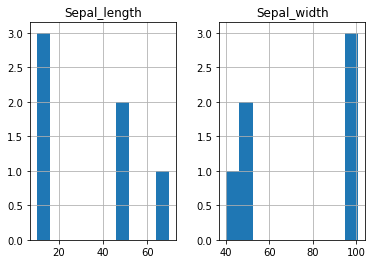

In [ ]:
df.hist()

<AxesSubplot:xlabel='Sepal_length', ylabel='Sepal_width'>

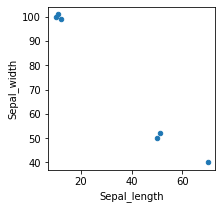

In [ ]:
# Scatterplot
df.plot(kind='scatter', x='Sepal_length', y='Sepal_width', figsize=(3,3))

<AxesSubplot:>

<Figure size 216x216 with 0 Axes>

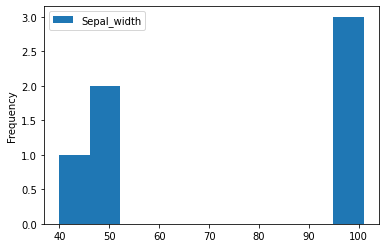

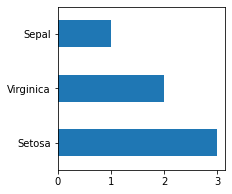

In [ ]:
# Histogram
plt.figure(figsize=(3,3));
df.plot(kind='hist', x='Sepal_length')

plt.figure(figsize=(3,3));
df['Species'].value_counts().plot(kind='barh')

# df['Sepal_length'].hist(bins=20)

<AxesSubplot:ylabel='Species'>

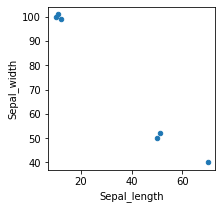

<Figure size 216x216 with 0 Axes>

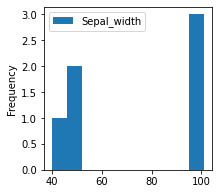

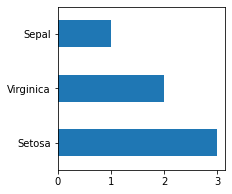

<Figure size 216x216 with 0 Axes>

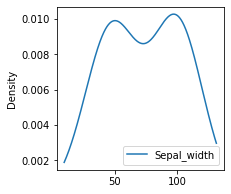

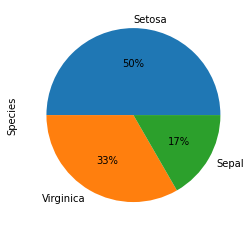

In [ ]:




# Density plot
plt.figure(figsize=(3,3));
df.plot(kind='density', x='Sepal_length', figsize=(3,3))

# Quick pie chart - count of entries
plt.figure(figsize=(3,3));
df['Species'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.0f%%')

array([[<AxesSubplot:xlabel='column 1', ylabel='column 1'>,
        <AxesSubplot:xlabel='column 1_1', ylabel='column 1'>,
        <AxesSubplot:xlabel='column 1_2', ylabel='column 1'>,
        <AxesSubplot:xlabel='column 1_3', ylabel='column 1'>,
        <AxesSubplot:xlabel='column 2', ylabel='column 1'>,
        <AxesSubplot:xlabel='column 3', ylabel='column 1'>],
       [<AxesSubplot:xlabel='column 1', ylabel='column 1_1'>,
        <AxesSubplot:xlabel='column 1_1', ylabel='column 1_1'>,
        <AxesSubplot:xlabel='column 1_2', ylabel='column 1_1'>,
        <AxesSubplot:xlabel='column 1_3', ylabel='column 1_1'>,
        <AxesSubplot:xlabel='column 2', ylabel='column 1_1'>,
        <AxesSubplot:xlabel='column 3', ylabel='column 1_1'>],
       [<AxesSubplot:xlabel='column 1', ylabel='column 1_2'>,
        <AxesSubplot:xlabel='column 1_1', ylabel='column 1_2'>,
        <AxesSubplot:xlabel='column 1_2', ylabel='column 1_2'>,
        <AxesSubplot:xlabel='column 1_3', ylabel='column 1_2'>,


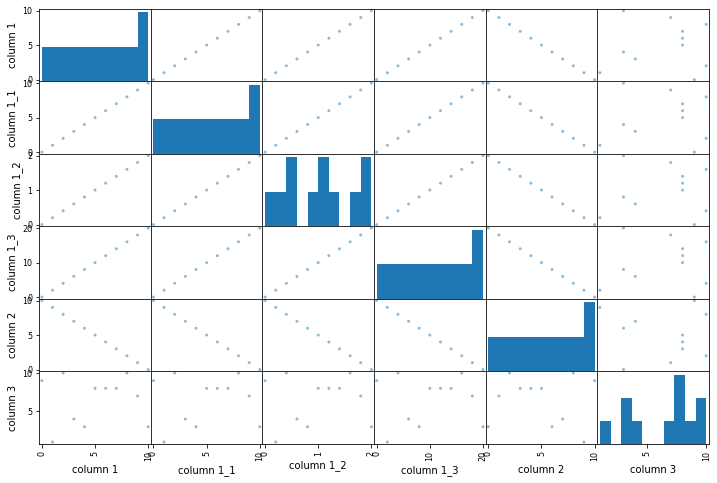

In [ ]:
import pandas as pd
import random
from pandas.plotting import scatter_matrix

df = pd.DataFrame({
	'column 1': list(range(0,11)),
	'column 1_1': list(range(0,11)),
	'column 1_2': [0,0.2,0.4,0.6,0.8,1,1.2, 1.4, 1.6, 1.8, 2],
	'column 1_3': list(range(0, 22, 2)),
	'column 2': list(range(10,-1,-1)),
	'column 3': [ random.randint(1,10) for i in range(0,11)  ]
})

scatter_matrix(df, figsize=(12,8))